In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [72]:
#conn1 = wether conn2 = sleep

# データベース1への接続
conn1 = sqlite3.connect('weather_data2020.sqlite')
cursor1 = conn1.cursor()

# データベース2への接続
conn2 = sqlite3.connect('sleep_data2020.sqlite')
cursor2 = conn2.cursor()


In [73]:
# データベース1からデータを取得
cursor1.execute('SELECT * FROM weather_data2020')
data1 = cursor1.fetchall()

# データベース2からデータを取得
cursor2.execute('SELECT * FROM sleep_data2020')
data2 = cursor2.fetchall()


In [74]:
# データをDataFrameに変換
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# データを結合
merged_df = pd.concat([df1, df2], ignore_index=True)


In [75]:
#データ1を編集して表示
df1.columns = ['date','rain_sum',"temperature_ave","temperature_max","temperature_min","sunlight"]
df1 = df1.drop(columns = "date")
df1

,rain_sum,temperature_ave,temperature_max,temperature_min,sunlight
0,0.0,8.0,16.0,0.3,6.1
1,10.5,10.5,13.6,6.6,0.0
2,2.0,12.1,18.4,7.1,6.4
3,0.0,7.3,13.2,1.8,7.3
4,0.0,6.1,16.1,-0.9,9.3
5,0.0,7.5,16.6,2.6,3.3
6,23.5,10.9,17.2,5.9,1.0
7,0.0,13.8,20.5,7.5,7.5
8,0.0,8.2,13.3,1.9,8.6
9,0.0,6.1,12.6,0.4,6.0


In [76]:
#データ2を編集して表示
df2.columns = ['assessment','time_of_sleep','good_quality_sleep',"deep_sleep","heart_rate"]
df2

,assessment,time_of_sleep,good_quality_sleep,deep_sleep,heart_rate
0,97,5:40,4:10,1:58,51
1,98,5:46,4:38,1:45,53
2,100,6:12,4:47,1:48,52
3,99,5:50,4:41,2:16,52
4,100,6:53,5:23,2:18,60
5,98,5:42,4:25,2:15,54
6,100,8:32,5:41,1:50,57
7,60,6:19,4:19,0:45,84
8,97,5:50,4:03,1:46,59
9,92,5:28,4:15,1:29,59


In [85]:
marge_df = pd.concat([df1,df2], axis=1, ignore_index=True)
marge_df.columns = ['rain_sum',"temperature_ave","temperature_max","temperature_min","sunlight",'assessment','time_of_sleep','good_quality_sleep',"deep_sleep","heart_rate"]
marge_df = marge_df.drop(columns='time_of_sleep')
marge_df = marge_df.drop(columns='good_quality_sleep')
marge_df = marge_df.drop(columns='deep_sleep')
marge_df

,rain_sum,temperature_ave,temperature_max,temperature_min,sunlight,assessment,heart_rate
0,0.0,8.0,16.0,0.3,6.1,97,51
1,10.5,10.5,13.6,6.6,0.0,98,53
2,2.0,12.1,18.4,7.1,6.4,100,52
3,0.0,7.3,13.2,1.8,7.3,99,52
4,0.0,6.1,16.1,-0.9,9.3,100,60
5,0.0,7.5,16.6,2.6,3.3,98,54
6,23.5,10.9,17.2,5.9,1.0,100,57
7,0.0,13.8,20.5,7.5,7.5,60,84
8,0.0,8.2,13.3,1.9,8.6,97,59
9,0.0,6.1,12.6,0.4,6.0,92,59


<Axes: >

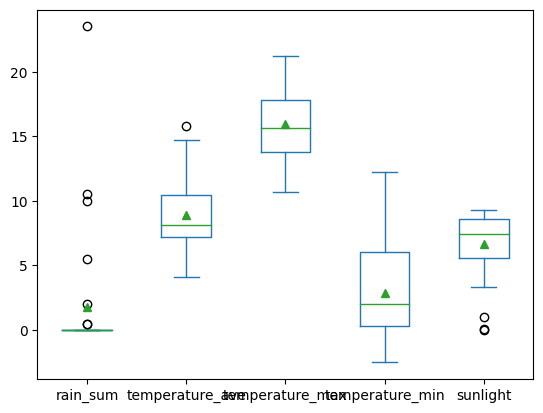

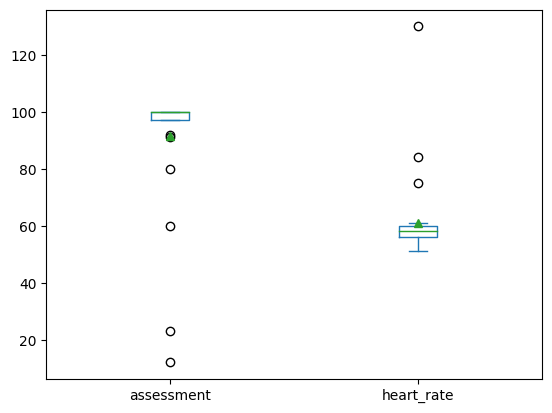

In [78]:
 # 箱ひげ図表示
df1.plot.box(showmeans=True)
df2.plot.box(showmeans=True)

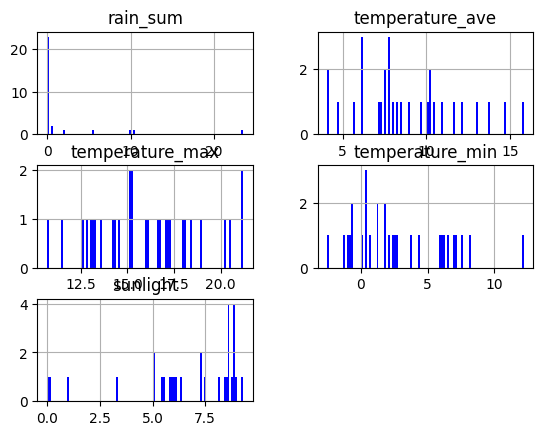

In [79]:
df1.hist(bins=100, color = "blue", grid =True, label = 'pandas') # ヒストグラム導出
plt.ylim(0,50)
plt.ylabel('frequency')
plt.xlabel('index')
plt.show()
plt.close()

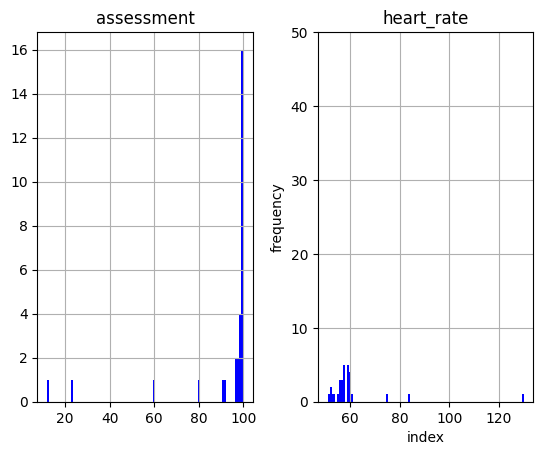

In [80]:
df2.hist(bins=100, color = "blue", grid =True, label = 'pandas') # ヒストグラム導出
plt.ylim(0,50)
plt.ylabel('frequency')
plt.xlabel('index')
plt.show()
plt.close()

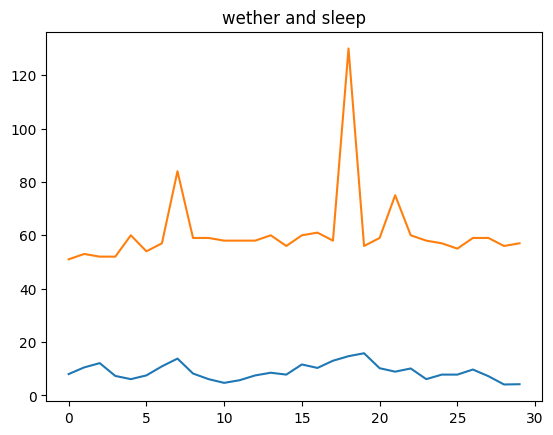

In [81]:
df1['temperature_ave'].plot(kind='line' , title = 'wether and sleep');
df2['heart_rate'].plot(kind='line');


/Users/iori/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/iori/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/iori/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20418 (\N{CJK UNIFIED IDEOGRAPH-4FC2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/iori/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/iori/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12498 (\N{KATAKANA LETTER HI}) missing fr

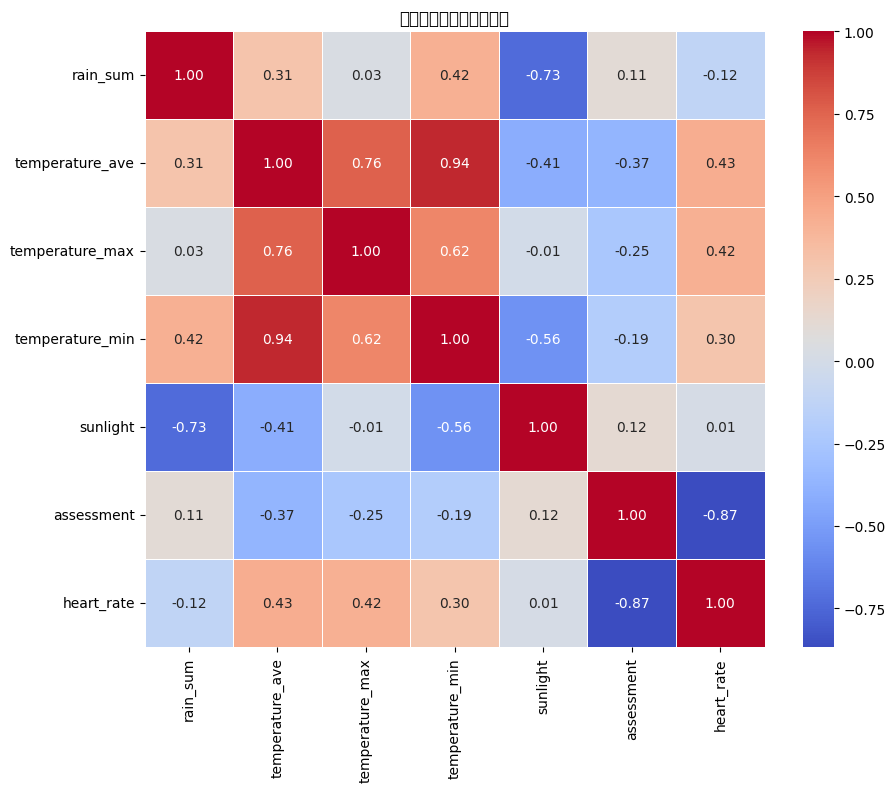

In [86]:
# 相関行列を計算
correlation_matrix = marge_df.corr()

# 相関関係を可視化 (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('相関関係のヒートマップ')
plt.show()